In [1]:
import numpy as np 
import pandas as pd

In [2]:
L=pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
df=L[0]
df.to_csv('df1')
df2=pd.read_csv('df1', names=['a','Postcode','Borough','Neighborhood'])
df2.drop(columns=['a'],inplace=True)
df2.drop([0,1],inplace=True)
df2.to_csv('df3')
df3=pd.read_csv('df3')
df3.columns=['a','Postcode','Borough','Neighborhood']
df3.drop(columns=['a'],inplace=True)
df4=pd.DataFrame(df3)

In [3]:
c=0
for n in df4['Borough']:
    if n == 'Not assigned':
        df4.drop([c],inplace=True)
    elif c==291:
        break
    c+=1

In [4]:
df5=df4.sort_values('Postcode')
df6=df5.drop_duplicates('Postcode')
df6.to_csv('df7')
df7=pd.read_csv('df7')
df7.columns=['a','Postcode','Borough','Neighborhood']
df7.drop(columns=['a'],inplace=True)

In [5]:
L=[]
for n in df5['Neighborhood']:
    m=n+', ' 
    L.append(m)
df5['Neighborhood']=L

In [6]:
df8=df5.groupby('Postcode').sum()
df8.to_csv('df9')
df9=pd.read_csv('df9')
df9.columns=['Postcode','Borough','Neighborhood']
df9['Borough']=df7['Borough']
L=[]
for n in df9['Neighborhood']:
    m=n[:-2]
    L.append(m)
df9['Neighborhood']=L

In [7]:
dt=pd.read_csv('http://cocl.us/Geospatial_data')

In [8]:
La=[]
for m in df9['Postcode']:
    c=0
    for n in dt['Postal Code']:
        if n==m:
            x=dt['Latitude'][c]
            La.append(x)
        c+=1
Lo=[]
for m in df9['Postcode']:
    c=0
    for n in dt['Postal Code']:
        if n==m:
            x=dt['Longitude'][c]
            Lo.append(x)
        c+=1
df9['Latitude']=La
df9['Longitude']=Lo

In [9]:
import random # library for random number generation
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

In [10]:
x1=df9['Latitude']
x2=df9['Longitude']

In [11]:
colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

In [12]:
def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]

In [13]:
def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    xticks = np.linspace(x1.min(), x1.max(), 10, endpoint=True)
    yticks = np.linspace(x2.min(), x2.max(), 10, endpoint=True)

    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    ax.set_xlabel('Longitude', fontsize=20)
    ax.set_ylabel('Latitude', fontsize=20)
    plt.xticks(rotation=45)
    ax.set_title(figure_title, fontsize=24)
    plt.show()

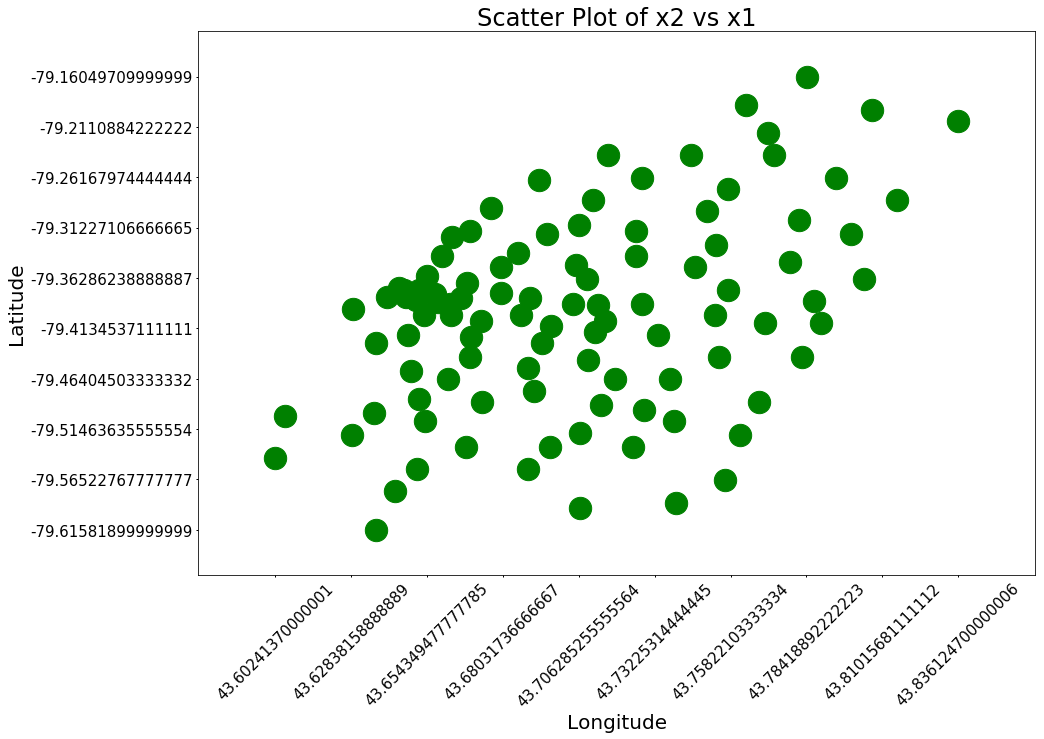

In [14]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

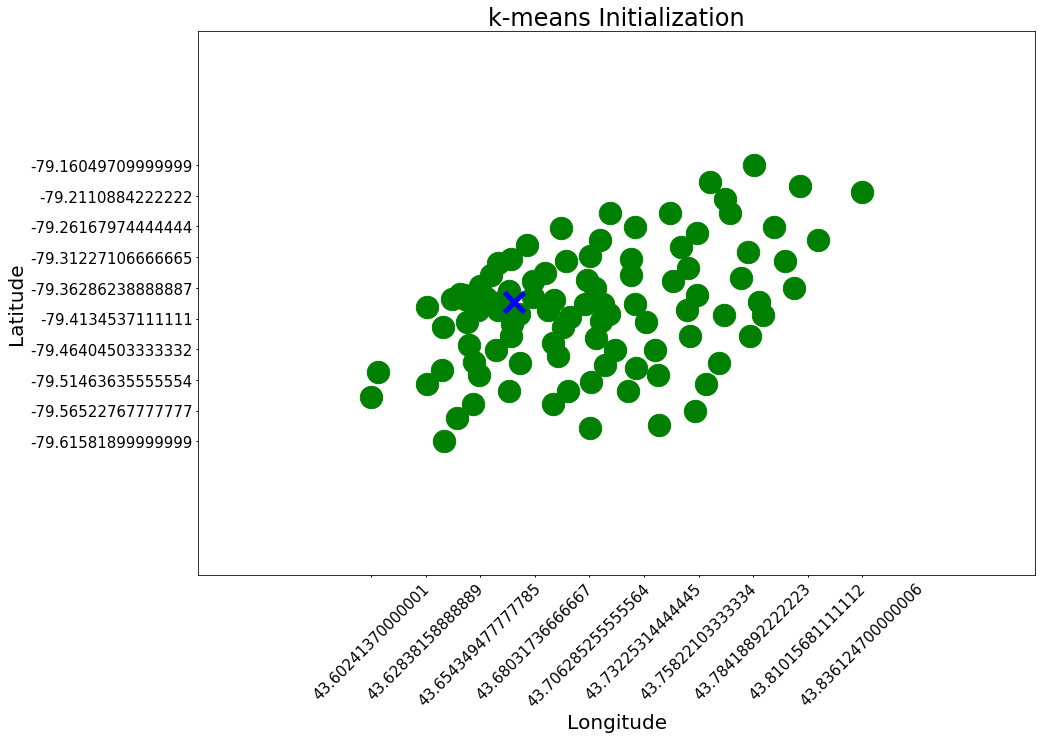

In [15]:
centers = [[43.6703, -79.3867]]
plot_points(centers, figure_title='k-means Initialization')

<b>Toronto</b>

<i>The city to be discovered in WEEK 3</i>

The city could be basically divided into two parts (clusters) almost equally - Northeast and Southwest.

The city centre could be easilly defined (43.71,-79.41) as well as sub-centres.

The city is in the range of Latitude[-79.62:-79.16] and Longitude[43.60:43.84]

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium 

In [17]:
map_toronto = folium.Map(location=[43.6703,-79.3867], zoom_start=10)

for lat, lng, borough, neighborhood in zip(df9['Latitude'], df9['Longitude'], df9['Borough'], df9['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto) 
map_toronto

I do know why, but the map cannot be shown while delivering to the Github.

The neighbourhood gets more centred while approaching Toronto - Toronto (the centre) near the coast